# Chapter 3: Polynomial Regression Exercise 🚗

## Learning Objectives 🎯
After completing this exercise, you will be able to:
- Apply polynomial regression to real-world automotive data
- Compare linear and polynomial models in practice
- Choose the best features for predicting fuel efficiency
- Find the optimal polynomial degree for your model
- Make practical predictions about car performance

Let's put your polynomial regression skills to work with a real-world automotive challenge! 🔧

In [56]:
%reset
low_memory=False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Nothing done.


## 3.1 Introduction & Motivation

### Moving Beyond Linear Regression 🚀

In the real world, relationships between variables aren't always straight lines. Think about cars:
- Does doubling the engine size exactly double the fuel consumption?
- Does adding weight affect fuel efficiency in a straight line?
- Do newer car models improve efficiency at a constant rate?

The answer to all these questions is: **Not really!** 

That's where polynomial regression comes in handy. It helps us capture these more complex relationships that linear regression can't handle.

#### What We'll Do Today 📋
1. Analyze real car data
2. Compare linear vs polynomial models
3. Find the best way to predict fuel efficiency
4. Learn how to choose the right model complexity

Get ready to dive into the automotive world of data science! 🏎️

## 3.2 Problem setting

### Understanding Fuel Efficiency 🚗

In the automotive industry, one of the most important measures is **MPG (Miles Per Gallon)**:
- 🛣️ How many miles a car can drive on one gallon of fuel
- 📈 Higher MPG = Better fuel efficiency
- 💰 Higher MPG = Lower fuel costs for drivers
- 🌍 Higher MPG = Better for the environment

#### Why MPG Matters 🤔
1. **For Consumers:**
   - Save money on fuel
   - Make environmentally conscious choices
   - Plan long-distance trips

2. **For Manufacturers:**
   - Meet government regulations
   - Attract eco-conscious buyers
   - Compete in the market

3. **For Environment:**
   - Reduce carbon emissions
   - Conserve fossil fuels
   - Lower environmental impact

Our challenge: Can we predict a car's MPG based on its characteristics? 🎯

## 3.3 Model

Go to canvas and donload the file "Auto.csv" from module 3. This data contains the required dataset.

In [57]:
df = pd.read_csv("Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 🔍 Data Analysis: First Steps

#### Question 1: Exploring Our Data
Look at the dataset carefully. We need to identify any columns that might cause problems:

1. **What to Look For:**
   - Which columns contain numbers? ✅
   - Which columns contain text? ❌
   - Why might text be problematic?

2. **Think About:**
   - Can regression work with text data?
   - How might we handle text data?
   - Would it be worth the effort?

3. **Advanced Consideration:**
   - What is one-hot encoding?
   - When is it useful?
   - Why might it not work here?

Your Analysis:
- The "car name" column contains text (strings)
- Regression needs numerical values
- While we could convert names to numbers (one-hot encoding), it wouldn't make sense here because:
  - Each car name is unique
  - Too many unique values for effective encoding
  - Names don't have a meaningful numerical relationship

##### Question 2: Drop the extra column.

In [58]:
df = df.drop(['car name'], axis=1)

Since we are working with a lot of variables, it is time to plot a heatmap.

<Axes: >

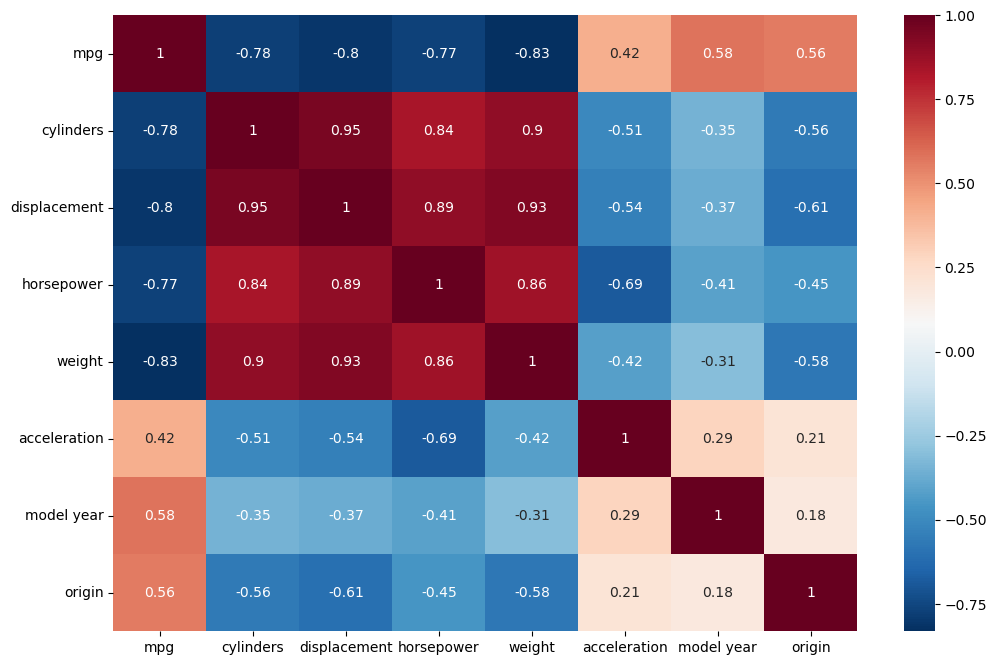

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)

### 📊 Understanding Variable Relationships

#### Question 3: Interpreting the Heatmap
The heatmap shows correlations between variables. Let's decode it:

1. **Reading the Colors:**
   - 🔴 Dark Red = Strong positive correlation (close to +1)
   - 🔵 Dark Blue = Strong negative correlation (close to -1)
   - ⚪ Light Colors = Weak correlation (close to 0)

2. **What We're Looking For:**
   - Which variables correlate strongly with MPG?
   - Which variables might not help predict MPG?
   - Are there any surprising relationships?

3. **Key Findings:**
   - 'Weight' shows a strong correlation with MPG
   - 'Displacement' also seems important
   - 'Acceleration' shows weak correlation

#### Question 4: Linear Regression with Weight
Let's test our first relationship:
1. Plot weight vs. MPG
2. Fit a linear model
3. Calculate R² and MSE
4. Visualize the results

Think About:
- Does the relationship look linear?
- How well does the straight line fit?
- Where does the model struggle?

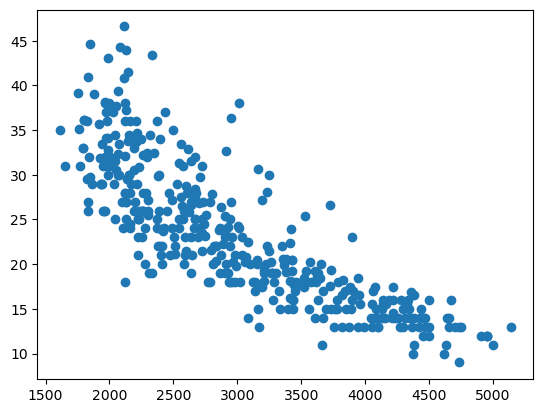

In [60]:
plt.plot(df["weight"], df["mpg"], 'o')
plt.show()

The R2 score of the model on the train set is: 0.6780128988922917
The MSE of the model on the test set is: 15.821924228587429


Text(0, 0.5, 'Y')

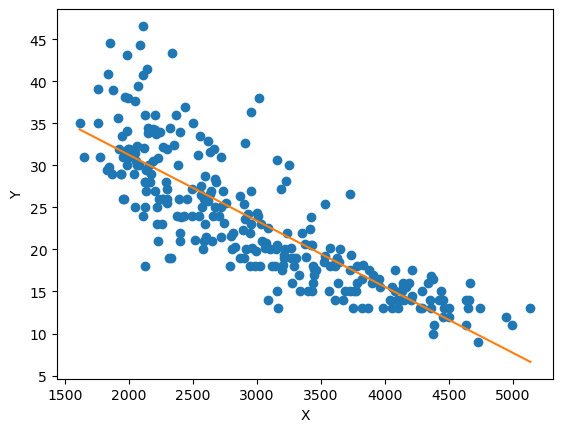

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df["weight"], df["mpg"], test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train.to_numpy().reshape(-1,1), y_train)
print('The R2 score of the model on the train set is:', model.score(X_train.to_numpy().reshape(-1,1), y_train))
print('The MSE of the model on the test set is:', mean_squared_error(model.predict(X_test.to_numpy().reshape(-1,1)), y_test))
plt.plot(X_train, y_train, 'o')
plt.plot([X_train.min(), X_train.max()], [model.predict([[X_train.min()]]), model.predict([[X_train.max()]])])
plt.xlabel("X")
plt.ylabel("Y")

### 📈 Analyzing Our Linear Model Results

#### Model Performance Analysis:
1. **R² Score = 0.68**
   - 68% of MPG variation explained by weight
   - Not terrible, but room for improvement
   - Suggests other factors are important

2. **Visual Assessment:**
   - Data shows a curved pattern
   - Our straight line misses this curve
   - Model is **underfitting** the data

3. **Understanding Underfitting:**
   - Model is too simple
   - Can't capture the non-linear relationship
   - Missing important patterns in the data

#### Question 5: Time for Polynomial Regression! 🚀
Let's improve our model:
1. Create a polynomial model
2. Choose a reasonable degree (start with 3)
3. Compare R² and MSE with linear model
4. Look for improvement in the curve fit

Remember: We're looking for a better fit without going too complex! 🎯

The R2 score of the model on the train set is: 0.6971823051844364
The MSE of the model on the test set is: 14.045818737230979


Text(0, 0.5, 'Y')

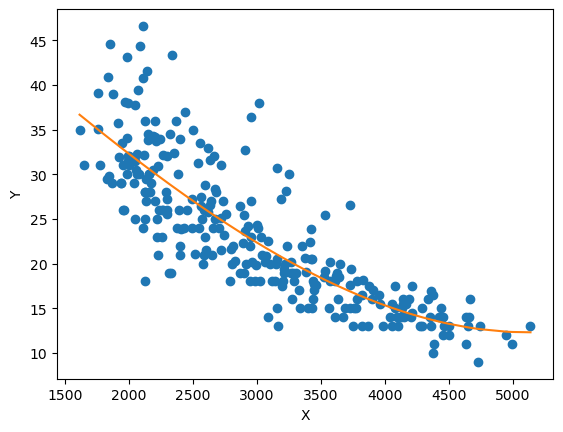

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df["weight"], df["mpg"], test_size=0.3, random_state=42)
model = LinearRegression()
pol_exp = PolynomialFeatures(degree=3)
model.fit(pol_exp.fit_transform(X_train.to_numpy().reshape(-1,1)), y_train)
print('The R2 score of the model on the train set is:', model.score(pol_exp.fit_transform(X_train.to_numpy().reshape(-1,1)), y_train))
print('The MSE of the model on the test set is:', mean_squared_error(model.predict(pol_exp.fit_transform(X_test.to_numpy().reshape(-1,1))), y_test))
plt.plot(X_train, y_train, 'o')
plt.plot(X_train.sort_values().to_numpy(), model.predict(pol_exp.fit_transform(X_train.sort_values().to_numpy().reshape(-1,1))))
plt.xlabel("X")
plt.ylabel("Y")

We can see our model now follows the data more closely. Our score for $R^2$ has improved slightly too. Our MSE of 14.0 is lower than the MSE of the linear model (15.8). We can speak of a certain improvement in our model, however there is still room for further improvement.

## 3.4 Model evaluation

### 🎯 Fine-Tuning Our Model

We've made progress, but now comes the crucial part: finding the perfect balance in our model. 

#### Why Model Tuning Matters
1. **Too Simple (Underfitting):**
   - Misses important patterns
   - Poor predictions
   - Low accuracy

2. **Too Complex (Overfitting):**
   - Captures noise in the data
   - Poor generalization
   - Unstable predictions

3. **Just Right (Optimal):**
   - Captures true patterns
   - Good generalization
   - Reliable predictions

Let's find that sweet spot! 🎯

### Question 6: Finding the Optimal Degree 🔍

Let's find the best polynomial degree for our model systematically:

1. **What We'll Do:**
   - Test degrees from 1 to 10
   - Calculate MSE for each degree
   - Plot the results
   - Look for the sweet spot

2. **Watch Out For:**
   - Training vs Testing MSE differences
   - Signs of overfitting
   - The "elbow" in the MSE curve

3. **How to Choose:**
   - Look for lowest test MSE
   - Check if training MSE is much lower
   - Consider model simplicity
   - Remember: simpler is often better!

🚨 **Overfitting Warning Signs:**
- Training MSE much lower than test MSE
- Test MSE starts increasing
- Very complex models (high degrees)

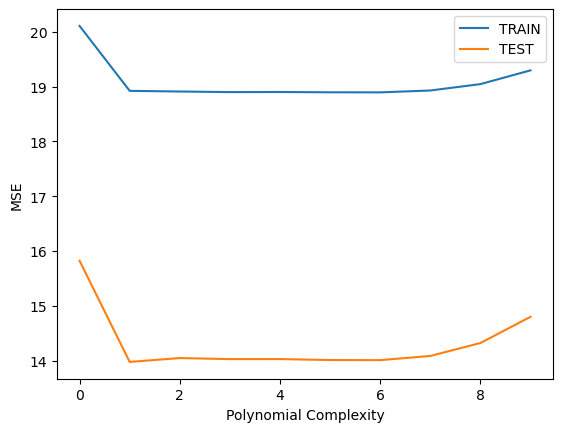

In [63]:
train_mse_errors = []
test_mse_errors = []

X_train, X_test, y_train, y_test = train_test_split(df["weight"], df["mpg"], test_size=0.3, random_state=42)

for d in range(1,11):
    model = LinearRegression()
    pol_exp = PolynomialFeatures(degree=d)
    model.fit(pol_exp.fit_transform(X_train.to_numpy().reshape(-1,1)), y_train)
    
    train_MSE = mean_squared_error(model.predict(pol_exp.fit_transform(X_train.to_numpy().reshape(-1,1))), y_train)
    test_MSE = mean_squared_error(model.predict(pol_exp.fit_transform(X_test.to_numpy().reshape(-1,1))), y_test)
    
    train_mse_errors.append(train_MSE)
    test_mse_errors.append(test_MSE)

plt.plot(train_mse_errors,label='TRAIN')
plt.plot(test_mse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("MSE")
plt.legend()

The lowest MSE is at position 1, meaning our model will perform best with a degree of 2.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df["weight"], df["mpg"], test_size=0.3, random_state=42)
model = LinearRegression()
pol_exp = PolynomialFeatures(degree=4)
model.fit(pol_exp.fit_transform(X_train.to_numpy().reshape(-1,1)), y_train)
print('The R2 score of the model on the train set is:', model.score(pol_exp.fit_transform(X_train.to_numpy().reshape(-1,1)), y_train))
print('The MSE of the model on the test set is:', mean_squared_error(model.predict(pol_exp.fit_transform(X_test.to_numpy().reshape(-1,1))), y_test))

The R2 score of the model on the train set is: 0.6973564008684954
The MSE of the model on the test set is: 14.026765579881994


## 3.5 Excercises

##### Question 1: See section 3.3

##### Question 2: See section 3.3

##### Question 3: See section 3.3

##### Question 4: See section 3.3

##### Question 5: See section 3.3

##### Question 6: See section 3.5

##### Question 7: A new car just came on the market with a weight of 2071 pounds. What MPG can we expect of this car?

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df["weight"], df["mpg"], test_size=0.3, random_state=42)

model = LinearRegression()
pol_exp = PolynomialFeatures(degree=2)
model.fit(pol_exp.fit_transform(X_train.to_numpy().reshape(-1,1)), y_train)
model.predict(pol_exp.fit_transform([[2071]]))

array([31.51751698])

According to our current model a car with a weight of 2071 pounds would result in a MPG of 31.52.

##### Question 8: Have another look at the heatmap from section 3.3. Can you spot another variable that might bring an improvement to the model? Figure out the best degree and retrain the model with 'weight' and the added variabele. Calculate $R^2$ and the MSE. Did the model improve?

Another variable that seems likely to have a predictive impact would be displacement. Let's plot this data.

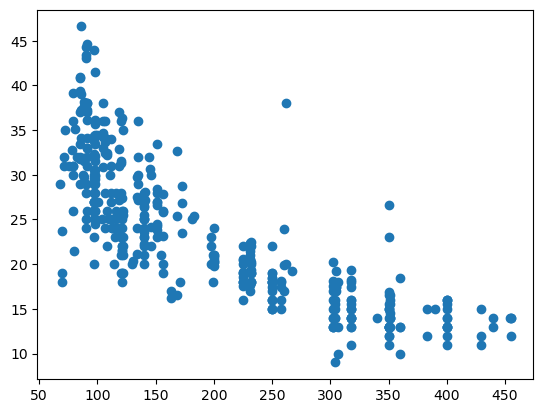

In [66]:
plt.plot(df["displacement"], df["mpg"], 'o')
plt.show()

We can see a curve in this data, meaning polynomial regression will likely result in a good model. To check this, we need to add the parameter to the model, figure out the best degree of the function and retrain the model.

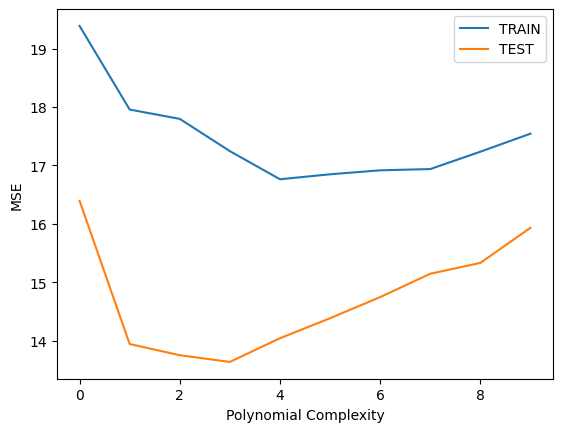

In [67]:
train_mse_errors = []
test_mse_errors = []

X_train, X_test, y_train, y_test = train_test_split(df[["weight","displacement"]], df["mpg"], test_size=0.3, random_state=42)

for d in range(1,11):
    model = LinearRegression()
    pol_exp = PolynomialFeatures(degree=d)
    model.fit(pol_exp.fit_transform(X_train), y_train)
    
    train_MSE = mean_squared_error(model.predict(pol_exp.fit_transform(X_train)), y_train)
    test_MSE = mean_squared_error(model.predict(pol_exp.fit_transform(X_test)), y_test)
    
    train_mse_errors.append(train_MSE)
    test_mse_errors.append(test_MSE)

plt.plot(train_mse_errors,label='TRAIN')
plt.plot(test_mse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("MSE")
plt.legend()

Interesting! Here we see the lowest MSE is at position 3, or a degree of 4. To see what effect this has on the model, we will retrain it using a degree of 4 and calculate $R^2$ and the MSE.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df[["weight","displacement"]], df["mpg"], test_size=0.3, random_state=42)
model = LinearRegression()
pol_exp = PolynomialFeatures(degree=4)
model.fit(pol_exp.fit_transform(X_train), y_train)
print('The R2 score of the model on the train set is:', model.score(pol_exp.fit_transform(X_train), y_train))
print('The MSE of the model on the test set is:', mean_squared_error(model.predict(pol_exp.fit_transform(X_test)), y_test))

The R2 score of the model on the train set is: 0.7238548688693766
The MSE of the model on the test set is: 13.638735292591694


$R^2$ is 0.72 which is already an improvement and the MSE is 13.6 which is an improvement over 14.0! We can conclude that the aditional parameter did bring an improvement to out model!

##### Question 9: Figure out which columns give the best result. Retrain your models as many times as needed using different columns. figure out the best degree and calculate $R^2$ and the MSE. What is the best model you can achieve?

Our first thought would be to train a model using all available data. We will figure out the best degree, then retrain and evaluate the model.

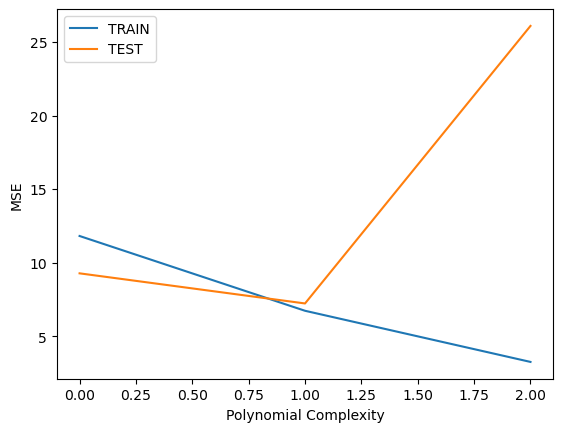

In [69]:
train_mse_errors = []
test_mse_errors = []

X_train, X_test, y_train, y_test = train_test_split(df.drop(['mpg'], axis=1), df["mpg"], test_size=0.3, random_state=42)

for d in range(1,4):
    model = LinearRegression()
    pol_exp = PolynomialFeatures(degree=d)
    model.fit(pol_exp.fit_transform(X_train), y_train)
    
    train_MSE = mean_squared_error(model.predict(pol_exp.fit_transform(X_train)), y_train)
    test_MSE = mean_squared_error(model.predict(pol_exp.fit_transform(X_test)), y_test)
    
    train_mse_errors.append(train_MSE)
    test_mse_errors.append(test_MSE)

plt.plot(train_mse_errors,label='TRAIN')
plt.plot(test_mse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("MSE")
plt.legend()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['mpg'], axis=1), df["mpg"], test_size=0.3, random_state=42)
model = LinearRegression()
pol_exp = PolynomialFeatures(degree=2)
model.fit(pol_exp.fit_transform(X_train), y_train)
print('The R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(X_train), y_train))
print('The MSE score of this model on the train set is:', mean_squared_error(model.predict(pol_exp.fit_transform(X_train)), y_train))
print('The MSE score of this model on the test set is:', mean_squared_error(model.predict(pol_exp.fit_transform(X_test)), y_test))

The R2 score of this model on the train set is: 0.892210503097213
The MSE score of this model on the train set is: 6.7315595781571975
The MSE score of this model on the test set is: 7.228894204500124


We now get an MSE of 7.2. That's great! However, maybe the model is a bit too complex. Let's try reducing the amount of features to see if we can get an even better model.

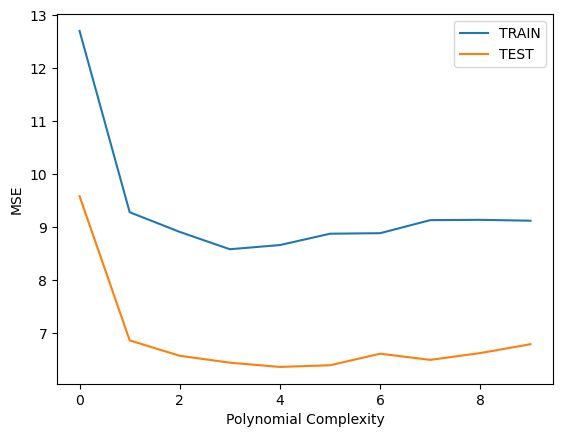

In [71]:
train_mse_errors = []
test_mse_errors = []

X_train, X_test, y_train, y_test = train_test_split(df[["weight","model year"]], df["mpg"], test_size=0.3, random_state=42)

for d in range(1,11):
    model = LinearRegression()
    pol_exp = PolynomialFeatures(degree=d)
    model.fit(pol_exp.fit_transform(X_train), y_train)
    
    train_MSE = mean_squared_error(model.predict(pol_exp.fit_transform(X_train)), y_train)
    test_MSE = mean_squared_error(model.predict(pol_exp.fit_transform(X_test)), y_test)
    
    train_mse_errors.append(train_MSE)
    test_mse_errors.append(test_MSE)

plt.plot(train_mse_errors,label='TRAIN')
plt.plot(test_mse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("MSE")
plt.legend()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df[["weight","model year"]], df["mpg"], test_size=0.3, random_state=42)
model = LinearRegression()
pol_exp = PolynomialFeatures(degree=5)
model.fit(pol_exp.fit_transform(X_train), y_train)
print('The R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(X_train), y_train))
print('The MSE score of this model on the train set is:', mean_squared_error(model.predict(pol_exp.fit_transform(X_train)), y_train))
print('The MSE score of this model on the test set is:', mean_squared_error(model.predict(pol_exp.fit_transform(X_test)), y_test))

The R2 score of this model on the train set is: 0.8613479327868724
The MSE score of this model on the train set is: 8.658957300093794
The MSE score of this model on the test set is: 6.357488284589578


### 🎉 Final Model Insights

After our extensive analysis, we've made some important discoveries:

#### 1. Model Evolution 📈
- Started with simple linear regression
- Explored polynomial relationships
- Found optimal feature combinations
- Achieved significant improvements

#### 2. Key Learnings 🔑
- Weight and model year are most important
- MSE improved from 15.8 to 6.35
- Simpler models can sometimes be better
- Feature selection matters a lot

#### 3. Real-World Implications 🌍
- More accurate MPG predictions
- Better understanding of car efficiency
- Practical tool for manufacturers
- Useful for consumer guidance

#### 4. Important Reminder ⚠️
There's no "perfect" model:
- Always room for improvement
- Trade-offs between complexity and accuracy
- Need to balance accuracy with practicality
- Real-world data is messy!

Remember: The goal isn't perfection (R² = 1, MSE = 0), but finding a reliable, practical model that helps make better predictions! 🎯